# Two parallel noncomunicating zones in a reservoir

# This one is only water flood (no low sal effect)
I'm injecting the seawater into a reservoir via a long horizontal well. The injectivity is better in some areas. I assign a larger injection rate to the 1D model for that zone, and a lower injection rate to the rest of the well, which is modelled again with a 1D model.

In [8]:
include("../FractionalFlow/FractionalFlow.jl")
using PyPlot, Dierckx, SetPyPlot
FF = FractionalFlow
setrcparam()

In [9]:
krw0_ww = 0.271636
krw0_ow = 0.226423
kro0_ww = 0.640774
kro0_ow = 0.53222
nw_ww = 3.74488
# nw_ow= 3.81109
# no_ww = 1.93454
nw_ow= 3.0
no_ww = 2.0
no_ow= 2.0844
sor_ww=0.333829
sor_ow=0.40325
sor_mw=0.1
swc_ww=0.212
swc_ow=0.212

u_inj_fast = 0.3e-5
u_inj_slow = 1.0e-5 
pv_inj_fast = 2.0
pv_inj_slow = u_inj_slow/u_inj_fast*pv_inj_fast
A_fast = 0.7 # normalized to a total injection area of 1.0
A_slow = 1-A_fast # normalized to a total injection area of 1.0
eq_const = 0.3

0.3

┌ Info: difficulty finding the shock front saturation range!
└ @ Main.FractionalFlow /home/ali/projects/peteng/analytical/FractionalFlow/FractionalFlow.jl:401
┌ Info: difficulty finding the shock front saturation range!
└ @ Main.FractionalFlow /home/ali/projects/peteng/analytical/FractionalFlow/FractionalFlow.jl:401


[0.0, 8.57888e-8, 1.83728e-7, 2.8803e-7, 3.97402e-7, 5.11244e-7, 6.29219e-7, 7.51116e-7, 8.76802e-7, 1.00619e-6, 1.13921e-6, 1.27583e-6, 1.41604e-6, 1.55981e-6, 1.70714e-6, 1.85806e-6, 2.01255e-6, 2.17064e-6, 2.33236e-6, 2.49771e-6, 2.66674e-6, 2.83946e-6, 3.0159e-6, 3.19611e-6, 3.3801e-6, 3.56791e-6, 3.75959e-6, 3.95516e-6, 4.15466e-6, 4.35813e-6, 4.56561e-6, 4.77713e-6, 4.99274e-6, 5.21247e-6, 5.43636e-6, 5.66446e-6, 5.89679e-6, 6.13341e-6, 6.37434e-6, 6.61964e-6, 6.86933e-6, 7.12346e-6, 7.38206e-6, 7.64517e-6, 7.91283e-6, 8.18507e-6, 8.46194e-6, 8.74346e-6, 9.02967e-6, 9.32061e-6, 9.6163e-6, 9.91678e-6, 1.02221e-5, 1.05322e-5, 1.08473e-5, 1.11672e-5, 1.14921e-5, 1.18219e-5, 1.21567e-5, 1.24965e-5, 1.28413e-5, 1.31911e-5, 1.3546e-5, 1.3906e-5, 1.4271e-5, 1.46411e-5, 1.50164e-5, 1.53967e-5, 1.57821e-5, 1.61727e-5, 1.65683e-5, 1.69691e-5, 1.73749e-5, 1.77859e-5, 1.82019e-5, 1.86229e-5, 1.9049e-5, 1.94801e-5, 1.99162e-5, 2.03573e-5, 2.08032e-5, 2.12541e-5, 2.17099e-5, 2.21704e-5, 2.2635

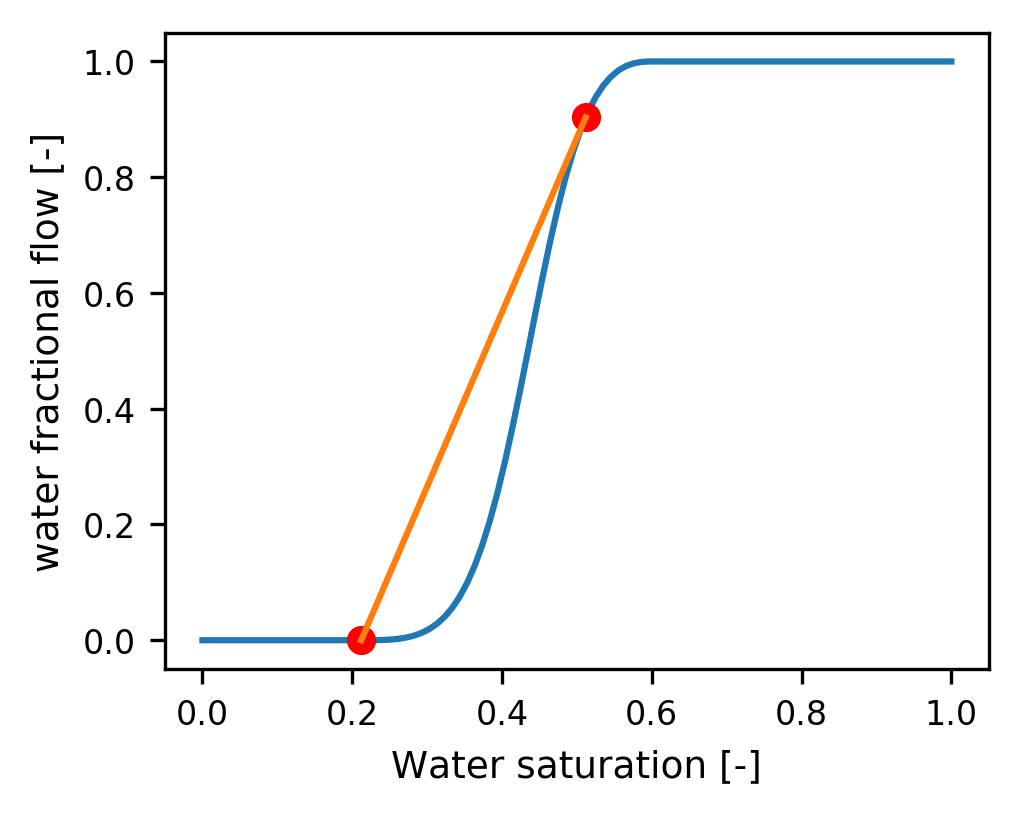

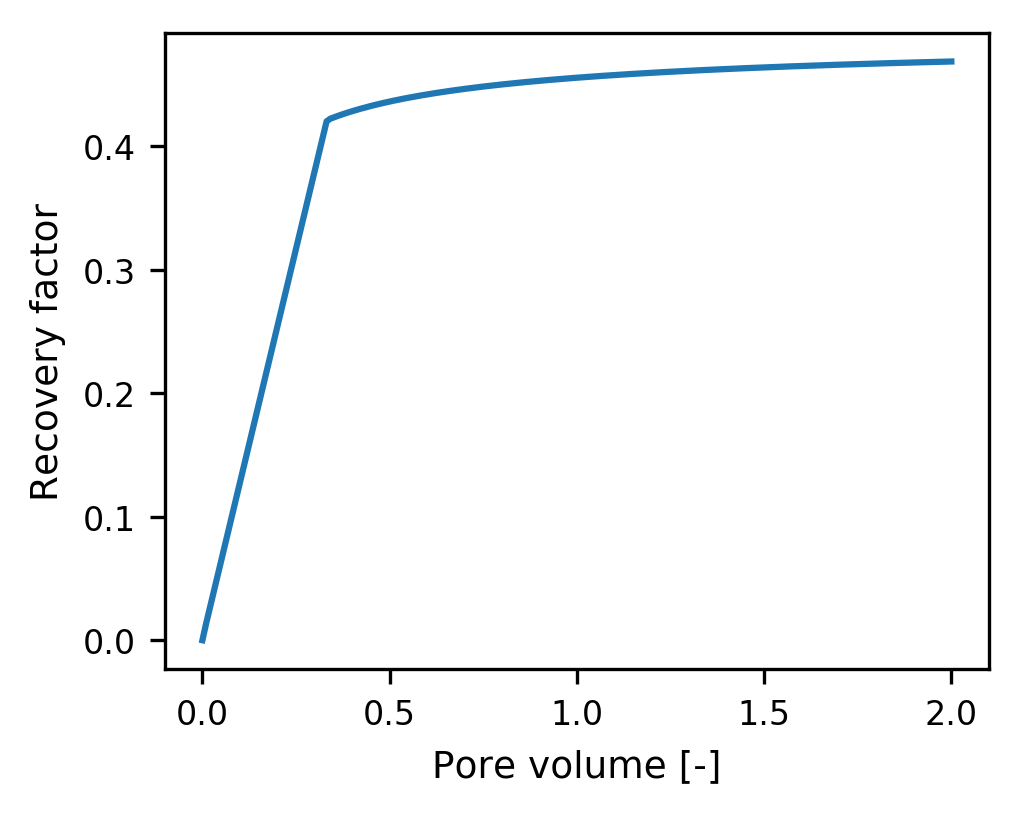

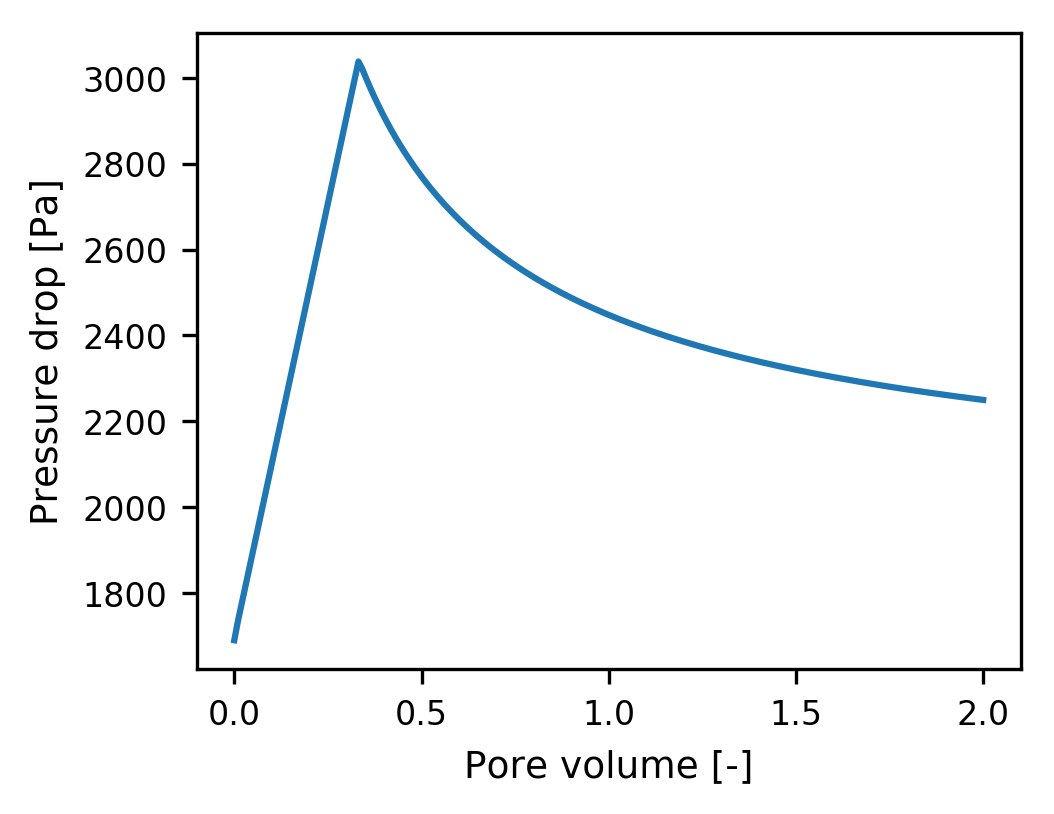

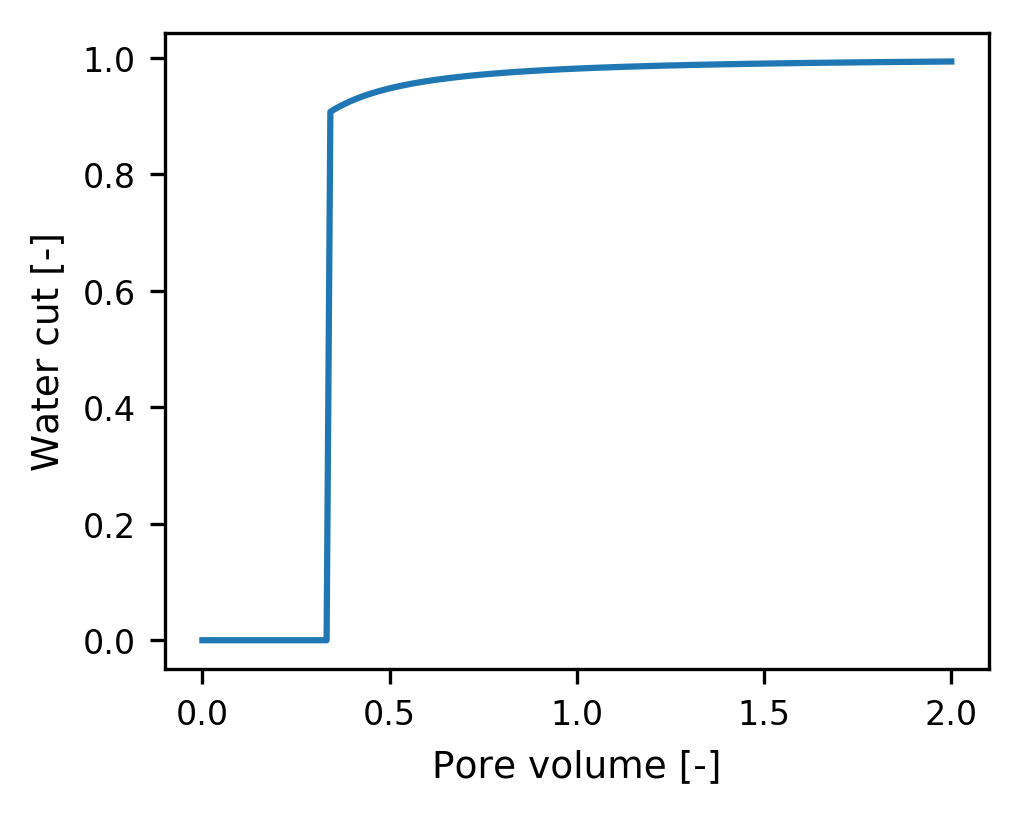

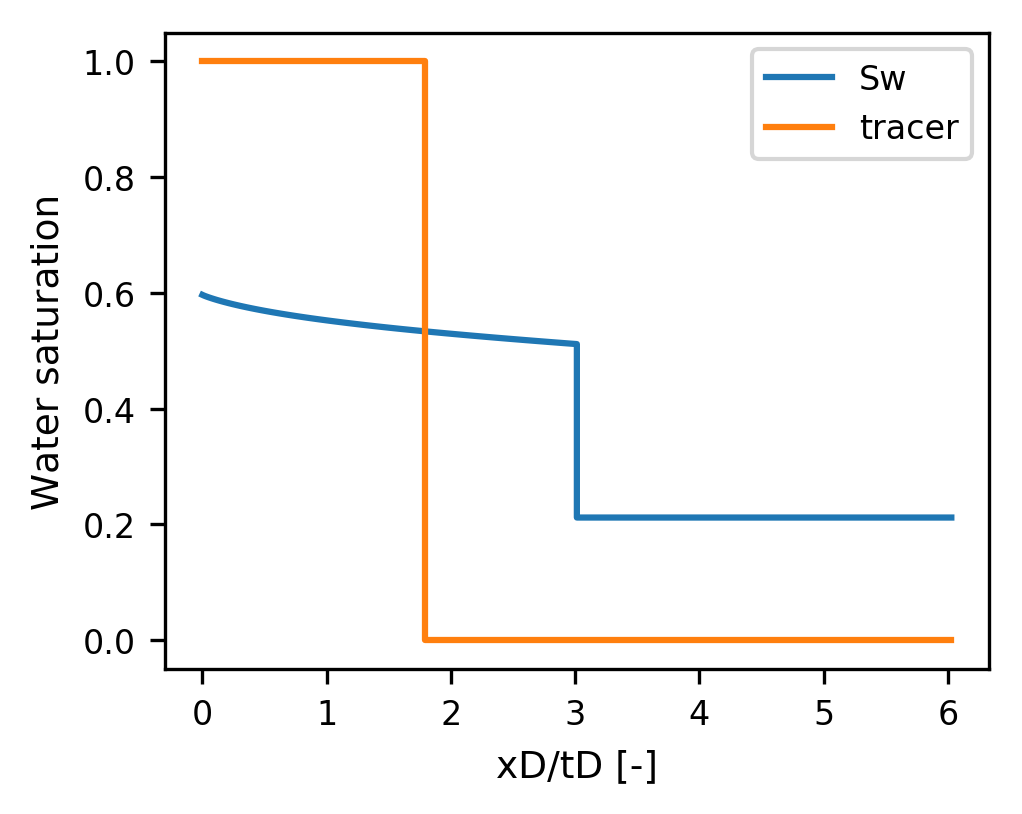

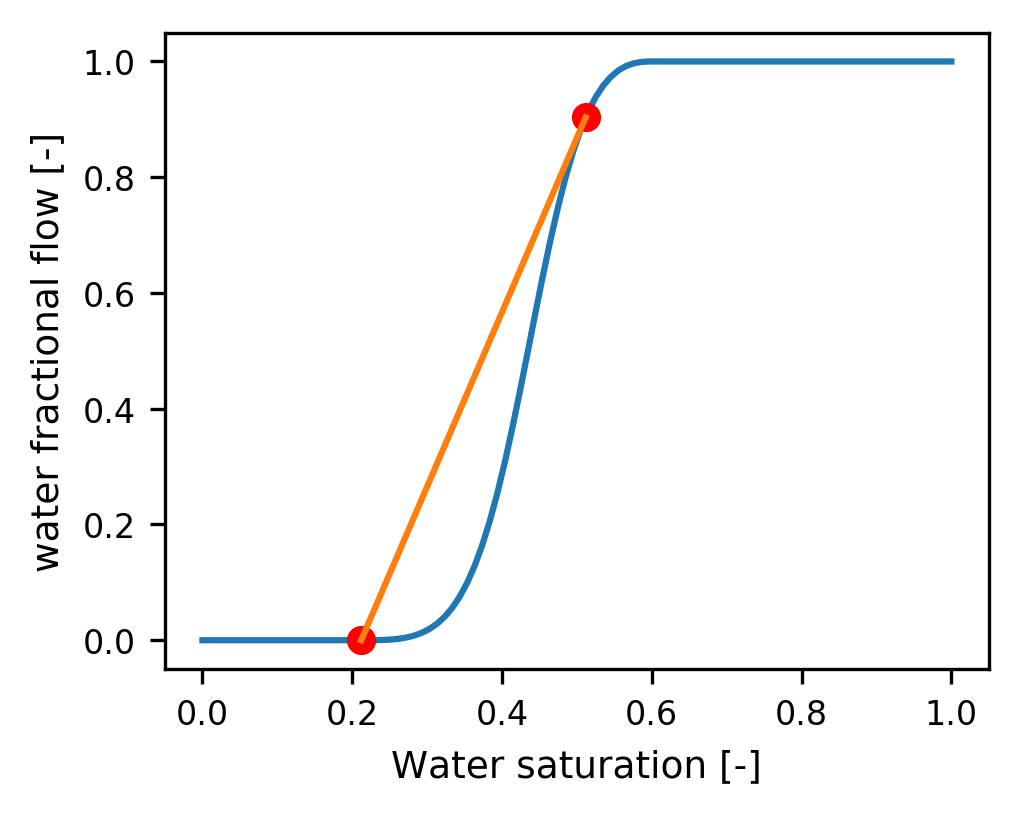

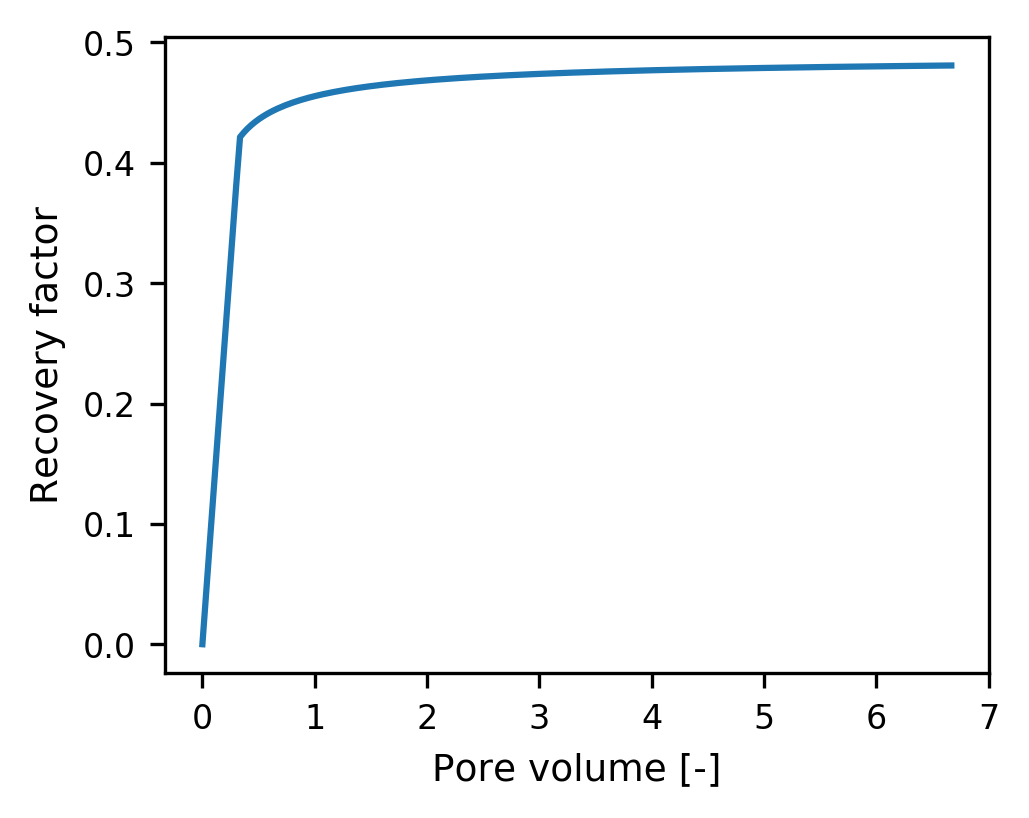

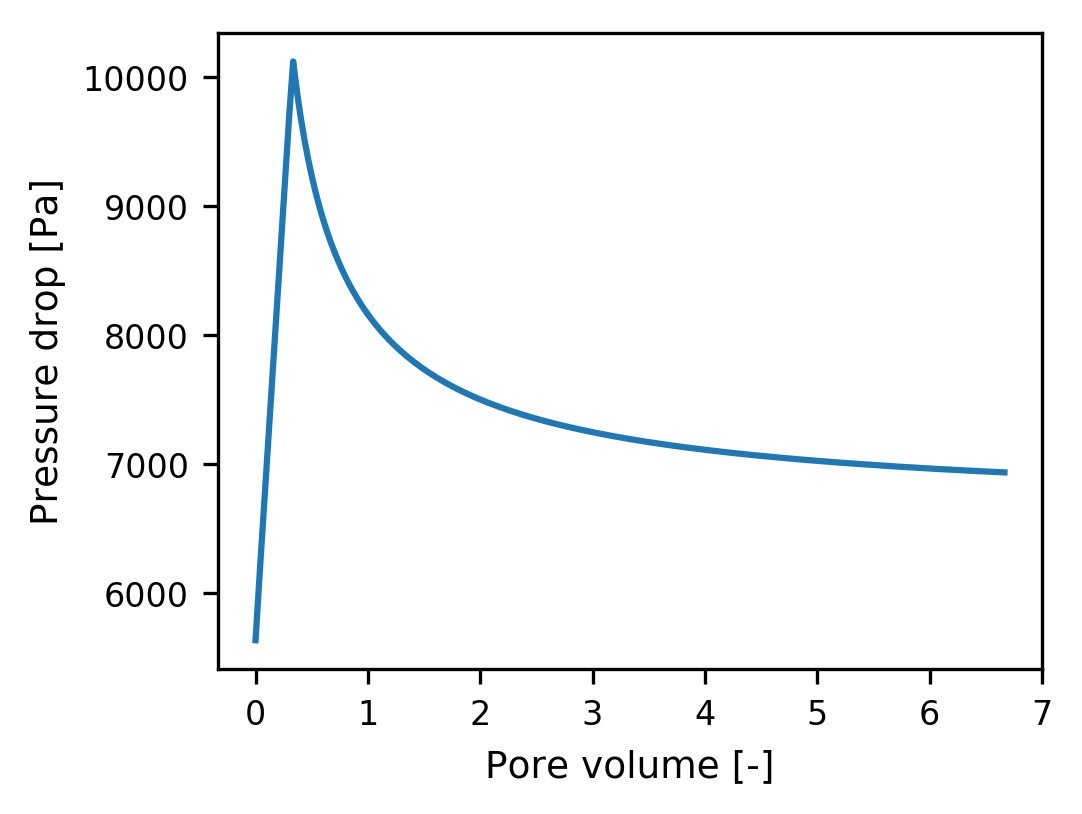

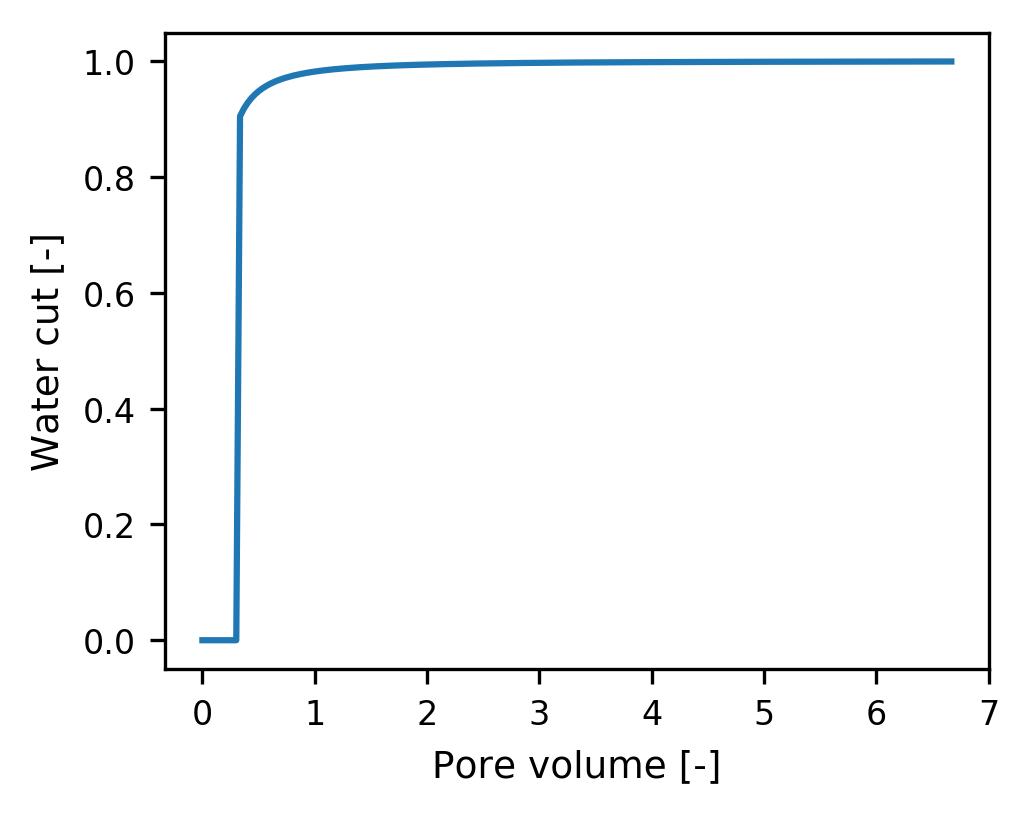

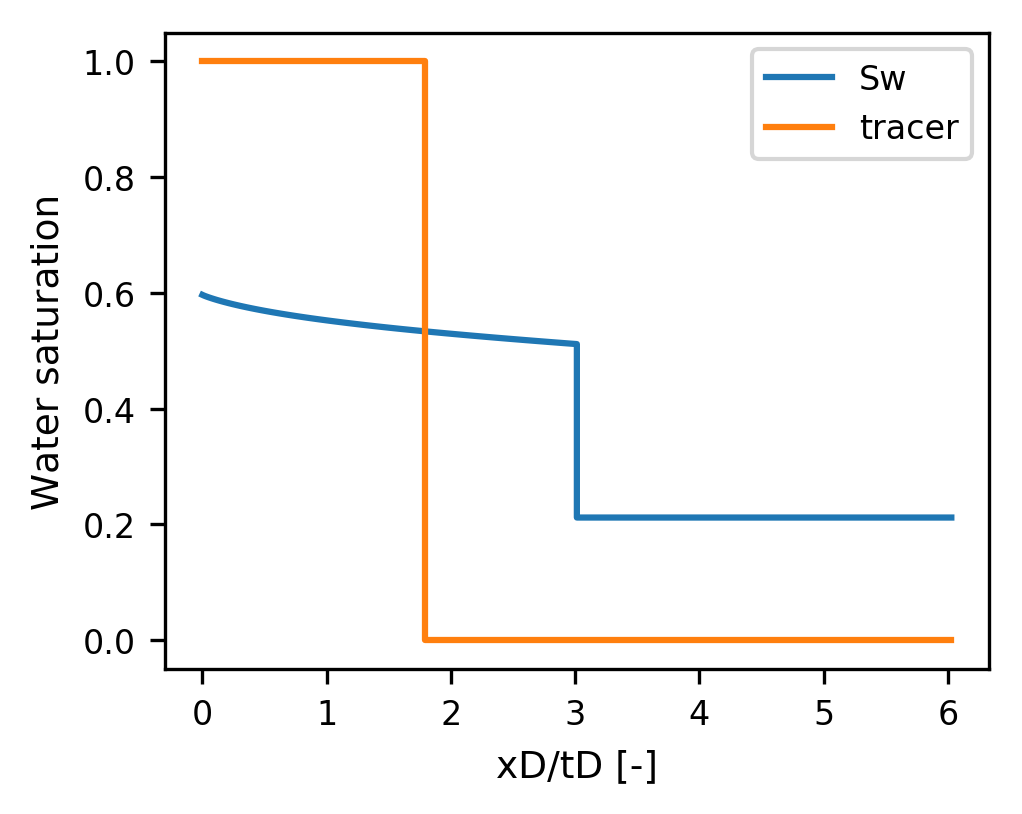

[0.0, 2.85963e-7, 6.12427e-7, 9.601e-7, 1.32467e-6, 1.70415e-6, 2.0974e-6, 2.50372e-6, 2.92267e-6, 3.35395e-6, 3.79736e-6, 4.25277e-6, 4.72012e-6, 5.19936e-6, 5.69048e-6, 6.19352e-6, 6.7085e-6, 7.23548e-6, 7.77453e-6, 8.32571e-6, 8.88913e-6, 9.46486e-6, 1.0053e-5, 1.06537e-5, 1.1267e-5, 1.1893e-5, 1.2532e-5, 1.31839e-5, 1.38489e-5, 1.45271e-5, 1.52187e-5, 1.59238e-5, 1.66425e-5, 1.73749e-5, 1.81212e-5, 1.88815e-5, 1.9656e-5, 2.04447e-5, 2.12478e-5, 2.20655e-5, 2.28978e-5, 2.37449e-5, 2.46069e-5, 2.54839e-5, 2.63761e-5, 2.72836e-5, 2.82065e-5, 2.91449e-5, 3.00989e-5, 3.10687e-5, 3.20543e-5, 3.30559e-5, 3.40736e-5, 3.51074e-5, 3.61575e-5, 3.7224e-5, 3.83068e-5, 3.94062e-5, 4.05222e-5, 4.16548e-5, 4.28042e-5, 4.39704e-5, 4.51534e-5, 4.63532e-5, 4.757e-5, 4.88038e-5, 5.00546e-5, 5.13223e-5, 5.26071e-5, 5.39089e-5, 5.52278e-5, 5.65636e-5, 5.79164e-5, 5.92862e-5, 6.06728e-5, 6.20764e-5, 6.34967e-5, 6.49337e-5, 6.63873e-5, 6.78575e-5, 6.93442e-5, 7.08471e-5, 7.23662e-5, 7.39014e-5, 7.54524e-5

┌ Info: difficulty finding the shock front saturation range!
└ @ Main.FractionalFlow /home/ali/projects/peteng/analytical/FractionalFlow/FractionalFlow.jl:401
┌ Info: difficulty finding the shock front saturation range!
└ @ Main.FractionalFlow /home/ali/projects/peteng/analytical/FractionalFlow/FractionalFlow.jl:401


PyObject <matplotlib.legend.Legend object at 0x7f4cd7a267f0>

In [10]:
fluids_hs = FF.oil_water_fluids(mu_water=1.1e-3, mu_oil=2e-3)
fluids_ls = FF.oil_water_fluids(mu_water=1e-3, mu_oil=2e-3)
rel_perms_hs = FF.oil_water_rel_perms(krw0=krw0_ow, kro0=kro0_ow, 
        swc=swc_ow, sor=sor_ow, nw=nw_ow, no = no_ow)
rel_perms_ls = FF.oil_water_rel_perms(krw0=krw0_ww, kro0=kro0_ww, 
        swc=swc_ww, sor=sor_ww, nw=nw_ww, no = no_ww)
core_flood_fast = FF.core_flooding(u_inj=u_inj_fast, pv_inject=pv_inj_fast, p_back=1e5, sw_init=swc_ow, sw_inj=1.0, rel_perms=rel_perms_hs)
core_flood_slow = FF.core_flooding(u_inj=u_inj_slow, pv_inject=pv_inj_slow, p_back=1e5, sw_init=swc_ow, sw_inj=1.0, rel_perms=rel_perms_hs)

core_props = FF.core_properties()
ls_res_fast = FF.water_flood(core_props, fluids_ls, rel_perms_hs, core_flood_fast)
ls_res_slow = FF.water_flood(core_props, fluids_ls, rel_perms_hs, core_flood_slow)

FF.visualize(ls_res_fast)
FF.visualize(ls_res_slow)

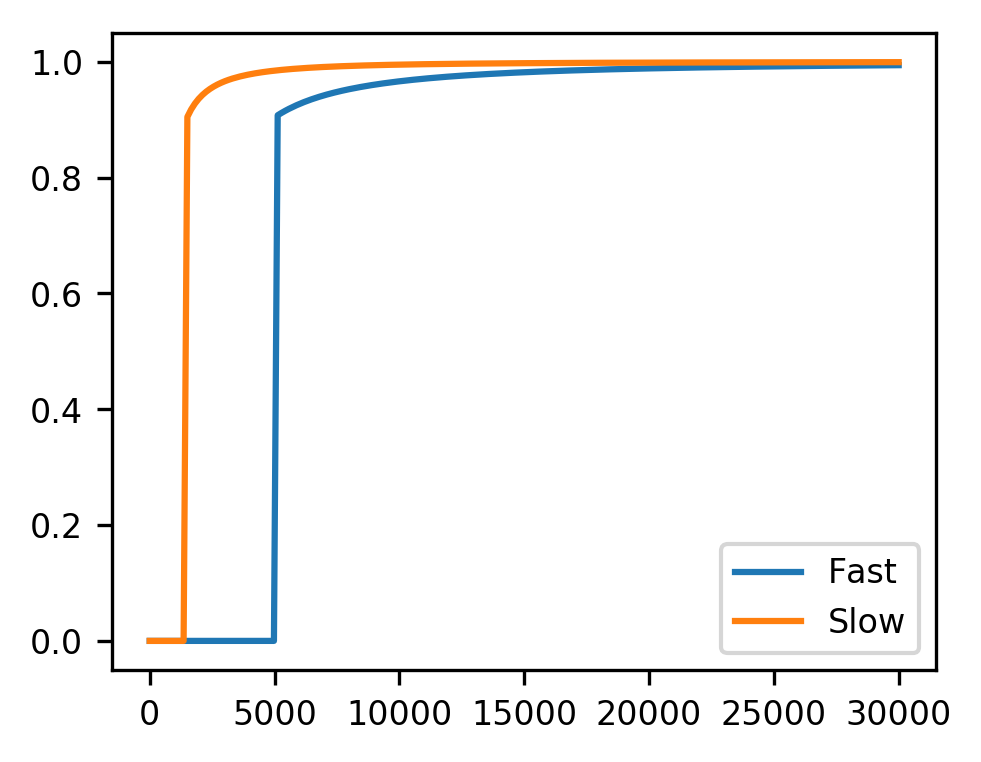

PyObject <matplotlib.legend.Legend object at 0x7f4cd7550b70>

In [11]:
plot(ls_res_fast.water_cut_time[:,1], ls_res_fast.water_cut_time[:,2], 
    ls_res_slow.water_cut_time[:,1], ls_res_slow.water_cut_time[:,2])
legend(["Fast", "Slow"])

The above figure shows the water cut in each zone. I need to add them together based on the total flow rate in each zone and plot the final value versus time. I need to know the total injection rate, the total surface area of each zone, and the water cut versus time. Then I calculate the new water cut versus time by calculating the total flow of oil and normalizing it.

In [12]:
t_fast = ls_res_fast.water_cut_time[:,1]
WC_fast = ls_res_fast.water_cut_time[:,2]
t_slow = ls_res_slow.water_cut_time[:,1]
WC_slow = ls_res_slow.water_cut_time[:,2]
WC_f =  Spline1D(t_fast, WC_fast, k=1, bc="nearest")
WC_s =  Spline1D(t_slow, WC_slow, k=1, bc="nearest")

Spline1D(knots=[0.0,150.754 … 29849.2,30000.0] (200 elements), k=1, extrapolation="nearest", residual=0.0)

In [13]:
t = range(0, 20000, length=20000)
WC = (u_inj_fast*A_fast.*WC_f(t)+u_inj_slow*A_slow.*WC_s(t))./(u_inj_fast*A_fast+u_inj_slow*A_slow)

20000-element Array{Float64,1}:
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 ⋮                 
 0.9943416003180039
 0.9943420593422865
 0.994342518366569 
 0.9943429773908519
 0.9943434364151345
 0.9943438954394171
 0.9943443544637   
 0.9943448134879825
 0.9943452725122651
 0.9943457315365479
 0.9943461905608305
 0.9943466495851132

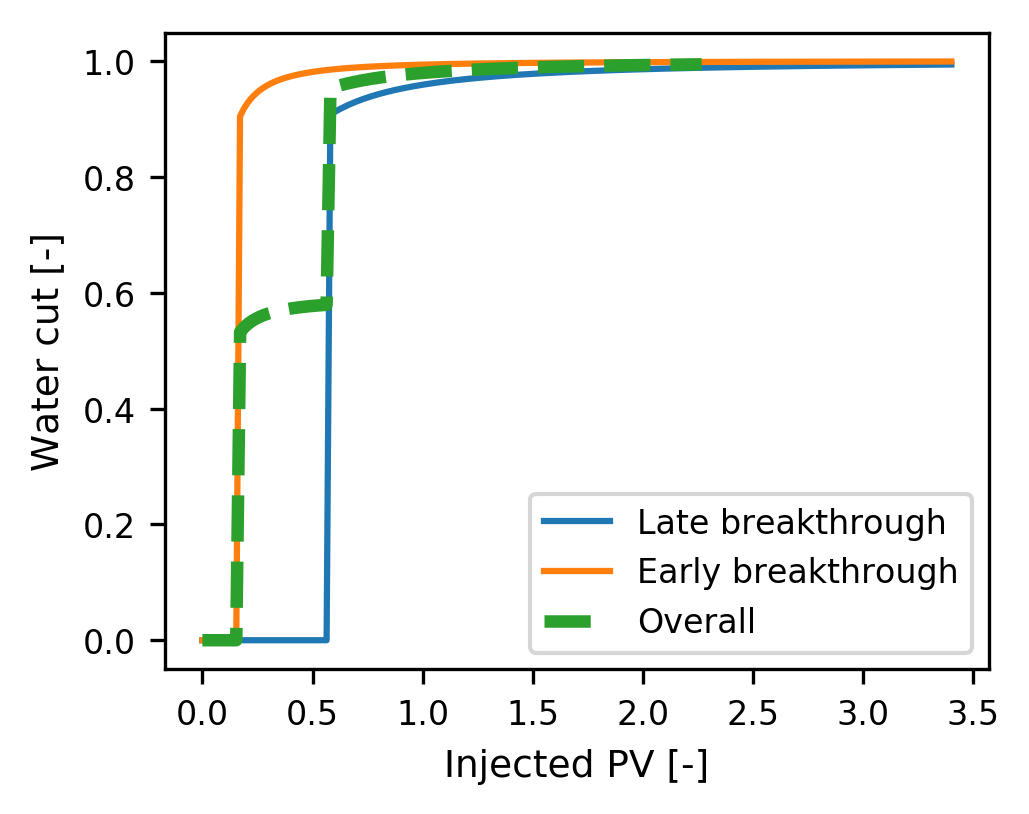

In [14]:
total_pv = pv_inj_fast*A_fast+pv_inj_slow*(1-A_fast)



plot(ls_res_fast.water_cut_time[:,1]./t_fast[end].*total_pv, ls_res_fast.water_cut_time[:,2], 
    ls_res_slow.water_cut_time[:,1]./t_fast[end].*total_pv, ls_res_slow.water_cut_time[:,2])

plot(t./t_fast[end].*total_pv, WC, linewidth = 3, "--")

legend(["Late breakthrough", "Early breakthrough", "Overall"])

xlabel("Injected PV [-]")
ylabel("Water cut [-]")

savefig("results/water_cut_WF_zones.png")